# Лабораторная работа 1. Методы поиска

Вариант: 16

In [1]:
import time
from typing import List
import random

## Задание 1. Алгоритм Рабина — Карпа (9)

Алгоритм Рабина — Карпа — это алгоритм поиска строки, который ищет шаблон, то есть подстроку, в тексте, используя хеширование. Он был разработан в 1987 году Михаэлем Рабином и Ричардом Карпом.

Алгоритм редко используется для поиска одиночного шаблона, но имеет значительную теоретическую важность и очень эффективен в поиске совпадений множественных шаблонов одинаковой длины. Для текста длины n и шаблона длины m его среднее и лучшее время исполнения равно $O(n)$ при правильном выборе хеш-функции, но в худшем случае он имеет эффективность $O(nm)$, что является одной из причин того, почему он не слишком широко используется. Для приложений, в которых допустимы ложные срабатывания при поиске, то есть, когда некоторые из найденных вхождений шаблона на самом деле могут не соответствовать шаблону, алгоритм Рабина — Карпа работает за гарантированное время $O(n)$ и при подходящем выборе рандомизированной хеш-функции вероятность ошибки можно сделать очень малой. Также алгоритм имеет уникальную особенность находить любую из заданных k строк одинаковой длины в среднем (при правильном выборе хеш-функции) за время $O(n)$ независимо от размера k.

### Сложность
- в лучшем случае: $O(n)$
- в худшем случае: $O(nm)$
- в среднем: $O(n)$

### Преимущества:
Одно из простейших практических применений алгоритма Рабина — Карпа состоит в определении плагиата. Скажем, например, что студент пишет работу по Моби Дику. Коварный профессор находит различные исходные материалы по Моби Дику и автоматически извлекает список предложений в этих материалах. Затем алгоритм Рабина — Карпа может быстро найти в проверяемой статье примеры вхождения некоторых предложений из исходных материалов. Для устранения чувствительности алгоритма к небольшим различиям можно игнорировать детали, такие как регистр или пунктуация, при помощи их удаления. Поскольку количество строк, которые мы ищем, k, очень большое, обычные алгоритмы поиска одиночных строк становятся неэффективными.

### Недостатки:
Алгоритм совершенно неэффективен, например, на поиске строки из 10 тысяч символов «a», за которыми следует «b», в строке из 10 миллионов символов «a». В этом случае он показывает своё худшее время исполнения $O(mn)$.

### Использование хэш-функции в алгоритме:

Вместо того, чтобы использовать более умный пропуск, алгоритм Рабина — Карпа пытается ускорить проверку эквивалентности образца с подстроками в тексте, используя хеш-функцию. Хеш-функция — это функция, преобразующая каждую строку в числовое значение, называемое хеш-значением (хеш); например, мы можем иметь хеш от строки «hello» равным 5. Алгоритм использует тот факт, что если две строки одинаковы, то и их хеш-значения также одинаковы. Таким образом, всё, что нам нужно, это посчитать хеш-значение искомой подстроки и затем найти подстроку с таким же хеш-значением.

Однако существуют две проблемы, связанные с этим. Первая состоит в том, что, так как существует очень много различных строк, между двумя различными строками может произойти коллизия — совпадение их хешей. В таких случаях необходимо посимвольно проверять совпадение самих подстрок, что занимает достаточно много времени, если данные подстроки имеют большую длину (эту проверку делать не нужно, если ваше приложение допускает ложные срабатывания). При использовании достаточно хороших хеш-функций коллизии случаются крайне редко, и в результате среднее время поиска оказывается невелико.

### Блок-схема агоритма

![img](./block.jpg)

### Псевдокод алгоритма

 ```
  function RabinKarp(string s[1..n], string sub[1..m])
      hsub := hash(sub[1..m])
      hs := hash(s[1..m])
      for i from 1 to (n-m+1)
          if hs = hsub
              if s[i..i+m-1] = sub
                  return i
          hs := hash(s[i+1..i+m])
      return not found
 ```

### Реализация алгоритма

In [2]:
# Following program is the python implementation of
# Rabin Karp Algorithm given in CLRS book

# d is the number of characters in the input alphabet
d = 256

# pat -> pattern
# txt -> text
# q -> A prime number

def search(pat, q, txt="", file_name=""):
    results = []
    if file_name != "":
        #open file
        f = open(file_name, 'r')
        try:
            txt = f.read()
        finally:
            f.close()
    
    if txt == "":
        return results
    M = len(pat)
    N = len(txt)
    i = 0
    j = 0
    p = 0 # hash value for pattern
    t = 0 # hash value for txt
    h = 1

    # The value of h would be "pow(d, M-1)% q"
    for i in range(M-1):
        h = (h * d)% q

    # Calculate the hash value of pattern and first window
    # of text
    for i in range(M):
        p = (d * p + ord(pat[i]))% q
        t = (d * t + ord(txt[i]))% q

    # Slide the pattern over text one by one
    for i in range(N-M + 1):
        # Check the hash values of current window of text and
        # pattern if the hash values match then only check
        # for characters one by one
        if p == t:
            # Check for characters one by one
            for j in range(M):
                if txt[i + j] != pat[j]:
                    break

            j+= 1
            # if p == t and pat[0...M-1] = txt[i, i + 1, ...i + M-1]
            if j == M:
                results.append(i)
                # print("Pattern found at index", str(i))

        # Calculate hash value for next window of text: Remove
        # leading digit, add trailing digit
        if i < N-M:
            t = (d*(t-ord(txt[i])*h) + ord(txt[i + M]))% q

            # We might get negative values of t, converting it to
            # positive
            if t < 0:
                t = t + q
    return results
# Driver program to test the above function
pat = "Harry"
q = 101 # A prime number
len(search(pat, q, file_name="Harry.txt"))

1326

### Тесты

In [3]:
assert search("aba", q, "abacaba") == [0, 4], 'Ошибка при поиске'

assert search("aba", q, "zzzzzz") == [], 'Ошибка при поиске несуществующей строки'

assert search("", q, "zzzzzz") == [], 'Ошибка при поиске пустой строки'

assert search("asd", q, "") == [], 'Ошибка при поиске в пустой строке'

**Время**

In [47]:
times = {}

In [48]:
# 1 size
start = time.time()

len(search("Harry", 101, file_name="files/Harry.txt"))

end = time.time()
t = round((end - start) * 10**3, 2)
times[1] = t
print(t)

172.06


In [49]:
# 2 size
start = time.time()

len(search("Harry", 101, file_name="Harry2.txt"))

end = time.time()
t = round((end - start) * 10**3, 2)
times[2] = t
print(t)

344.07


In [50]:
# 4 size
start = time.time()

len(search("Harry", 101, file_name="Harry4.txt"))

end = time.time()
t = round((end - start) * 10**3, 2)
times[4] = t
print(t)

696.16


In [51]:
# 16 size
start = time.time()

len(search("Harry", 101, file_name="Harry16.txt"))

end = time.time()
t = round((end - start) * 10**3, 2)
times[16] = t
print(t)

2760.72


In [52]:
# 32 size
start = time.time()

len(search("Harry", 101, file_name="Harry32.txt"))

end = time.time()
t = round((end - start) * 10**3, 2)
times[32] = t
print(t)

5525.64


**График**

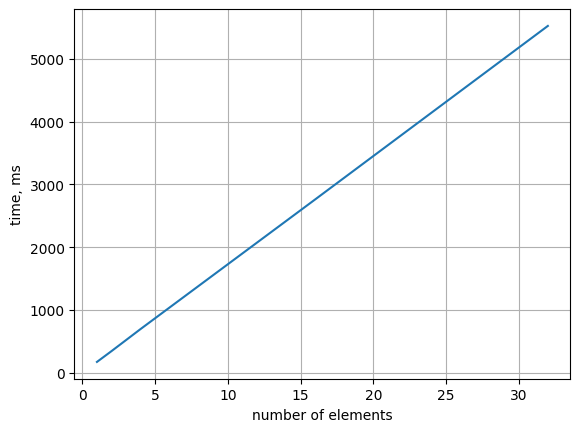

In [53]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(times.keys(), times.values())
plt.ylabel('time, ms')
plt.xlabel('number of elements')
plt.grid(True)
plt.show()

### Литература

https://ru.wikipedia.org/wiki/Алгоритм_Рабина_—_Карпа

https://www.geeksforgeeks.org/python-program-for-rabin-karp-algorithm-for-pattern-searching/

## Задание 2. Интерполяционный поиск

### Описание алгоритма

Интерполяционный поиск (интерполирующий поиск) основан на принципе поиска в телефонной книге или, например, в словаре. Вместо сравнения каждого элемента с искомым, как при линейном поиске, данный алгоритм производит предсказание местонахождения элемента: поиск происходит подобно двоичному поиску, но вместо деления области поиска на две части, интерполирующий поиск производит оценку новой области поиска по расстоянию между ключом и текущим значением элемента. Другими словами, бинарный поиск учитывает лишь знак разности между ключом и текущим значением, а интерполирующий ещё учитывает и модуль этой разности и по данному значению производит предсказание позиции следующего элемента для проверки. В среднем интерполирующий поиск производит $O(log(log(n)))$ операций, где n есть число элементов, среди которых производится поиск. Число необходимых операций зависит от равномерности распределения значений среди элементов. В плохом случае (например, когда значения элементов экспоненциально возрастают) интерполяционный поиск может потребовать до $O(n)$ операций.

На практике интерполяционный поиск часто быстрее бинарного, так как с вычислительной стороны их отличают лишь применяемые арифметические операции: интерполирование — в интерполирующем поиске и деление на два — в двоичном, а скорость их вычисления отличается незначительно, с другой стороны интерполирующий поиск использует такое принципиальное свойство данных, как однородность распределения значений. Ключом может быть не только номер, число, но и, например, текстовая строка, тогда становится понятна аналогия с телефонной книгой: если мы ищем имя в телефонной книге, начинающееся на «А», следовательно, нужно искать его в начале, но никак не в середине. В принципе, ключом может быть всё что угодно, так как те же строки, например, запросто кодируются посимвольно, в простейшем случае символ можно закодировать значением от 1 до 33 (только русские символы) или, например, от 1 до 26 (только латинский алфавит) и т. д.

Интерполяция может производиться на основе функции, аппроксимирующей распределение значений, либо набора кривых, выполняющих аппроксимацию на отдельных участках. В этом случае поиск может завершиться за несколько проверок. Преимущества этого метода состоят в уменьшении запросов на чтение медленной памяти (такой, как, например, жесткий диск), если запросы происходят часто. Такой подход становится похожим на частный случай поиска с использованием хеш-таблицы.

Часто анализ и построение аппроксимирующих кривых не требуется, показательный случай здесь — когда все элементы отсортированы по возрастанию. В таком списке минимальное значение будет по индексу 1, а максимальное по индексу n. В этом случае аппроксимирующую кривую можно принять за прямую и применять линейную интерполяцию.

### Сложность

- в лучшем случае: $O(1)$
- в худшем случае: $O(n)$
- в среднем: $O(log(log(n)))$

### Преимущества:

Когда все элементы в списке отсортированы и равномерно распределены, время выполнения алгоритма поиска с интерполяцией составляет log (log n). То есть в лучшем случае.

### Недостатки:

Когда элементы в списке увеличиваются экспоненциально, время выполнения алгоритма поиска с интерполяцией составляет O (n). т.е. худший случай

### Блок-схема

![img](./sort.jpg)

### Псевдокод алгоритма

In [6]:
int interpolationSearch(a : int[], key : int)  // a должен быть отсортирован 
  left = 0  // левая граница поиска (будем считать, что элементы массива нумеруются с нуля) 
  right = a.length - 1  // правая граница поиска 

  while a[left] < key and key < a[right]
    mid = left + (key - a[left]) * (right - left) / (a[right] - a[left])  // индекс элемента, с которым будем проводить сравнение 
    if a[mid] < key
      left = mid + 1
    else if a[mid] > key
      right = mid - 1
    else
      return mid

  if a[left] == key
    return left
  else if a[right] == key
    return right
  else
    return -1 // если такого элемента в массиве нет 

SyntaxError: invalid syntax (363596321.py, line 1)

### Реализация алгоритма

In [20]:
# Функция для определения, существует ли цель в отсортированном списке `A` или нет
# с использованием алгоритма интерполяционного поиска
def interpolationSearch(A, target):
 
    # Базовый вариант
    if not A:
        return -1
    # пространство поиска A[left…right]
    (left, right) = (0, len(A) - 1)
 
    while A[right] != A[left] and A[left] <= target <= A[right]:
 
        # оценка средняя
        mid = left + (target - A[left]) * (right - left) // (A[right] - A[left])
 
        # Ключ # найден
        if target == A[mid]:
            return mid
        # отбрасывает все элементы в правом пространстве поиска, включая средний элемент
        elif target < A[mid]:
            right = mid - 1
        # отбрасывает все элементы в левой области поиска, включая средний элемент
        else:
            left = mid + 1
 
    # если ключ найден
    if target == A[left]:
        return left
 
    # Цель # не существует в списке
    return -1
 
 
if __name__ == '__main__':
 
    A = [2, 5, 6, 8, 9, 10]
    key = 8
 
    index = interpolationSearch(A, key)
 
    if index != -1:
        print('Element found at index', index)
    else:
        print('Element found not in the list')

Element found at index 3


### Тесты

In [29]:
assert interpolationSearch([1, 2, 3, 4, 5], 2) == 1, 'Ошибка при поиске'

assert interpolationSearch([1, 2, 3, 4, 5], 6) == -1, 'Ошибка при поиске несуществующей строки'

assert interpolationSearch([], 2) == -1, 'Ошибка при поиске пустой строки'

**Время**

In [78]:
times = {}
def get_sort_array(n:int)->List:
    '''Возвращает отсортированный массив'''
    return list(range(n))

In [79]:
# 100 size
n = 100
arr = get_sort_array(n)
rnd = int(random.random() * n)
print(rnd)
start = time.time()

interpolationSearch(arr, rnd)

end = time.time()
t = round((end - start) * 10**3, 2)
times[100] = t
print(t)

26
0.0


In [80]:
# 1000 size
n = 1000
arr = get_sort_array(n)
rnd = int(random.random() * n)
start = time.time()

interpolationSearch(arr, rnd)

end = time.time()
t = round((end - start) * 10**3, 2)
times[1000] = t
print(t)

0.0


In [81]:
# 10000 size
n = 10000
arr = get_sort_array(n)
rnd = int(random.random() * n)
start = time.time()

interpolationSearch(arr, rnd)

end = time.time()
t = round((end - start) * 10**3, 2)
times[10000] = t
print(t)

0.0


In [82]:
# 100000 size
n = 100000
arr = get_sort_array(n)
rnd = int(random.random() * n)
start = time.time()

interpolationSearch(arr, rnd)

end = time.time()
t = round((end - start) * 10**3, 2)
times[100000] = t
print(t)

0.0


In [83]:
# 1000000 size
n = 1000000
arr = get_sort_array(n)
rnd = int(random.random() * n)
print(rnd)
start = time.time()

interpolationSearch(arr, rnd)

end = time.time()
t = round((end - start) * 10**3, 2)
times[1000000] = t
print(t)

135161
0.0


In [84]:
**График**

SyntaxError: invalid syntax (620917977.py, line 1)

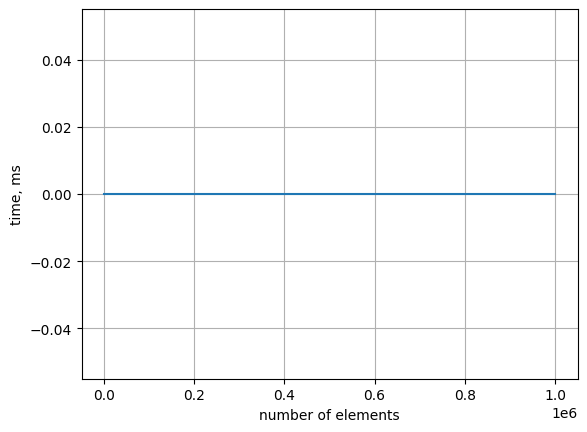

In [85]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(times.keys(), times.values())
plt.ylabel('time, ms')
plt.xlabel('number of elements')
plt.grid(True)
plt.show()

### Литература

https://ru.wikipedia.org/wiki/Интерполяционный_поиск

https://translated.turbopages.org/proxy_u/en-ru.ru.462b41d8-641d5feb-178ac6b2-74722d776562/https/en.wikipedia.org/wiki/Interpolation_search

https://digitrain.ru/articles/21606/

https://www.techiedelight.com/ru/interpolation-search/

https://neerc.ifmo.ru/wiki/index.php?title=Интерполяционный_поиск